In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import decimate
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

In [154]:
speeds = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').iloc[0].values[1:].astype(str)
subjects = list(pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc').columns[1:].astype(str).str.split('.'))
subject_index = dict()
trial = 0
last_speed = '-1'
for i in range(len(subjects)):
    if speeds[i] != last_speed:
        trial = 0
    else:
        trial = trial + 1
    last_speed = speeds[i]
    subject_index[subjects[i][0]+','+speeds[i] + ','+ str(trial)] = i + 1

In [155]:
data_acc = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured TrunkAcc', skiprows=2)
data_acc

,Time (ms),TrunkAcc (g),TrunkAcc (g).1,TrunkAcc (g).2,TrunkAcc (g).3,TrunkAcc (g).4,TrunkAcc (g).5,TrunkAcc (g).6,TrunkAcc (g).7,TrunkAcc (g).8,TrunkAcc (g).9,TrunkAcc (g).10,TrunkAcc (g).11,TrunkAcc (g).12,TrunkAcc (g).13,TrunkAcc (g).14,TrunkAcc (g).15,TrunkAcc (g).16,TrunkAcc (g).17,TrunkAcc (g).18,TrunkAcc (g).19,TrunkAcc (g).20,TrunkAcc (g).21,TrunkAcc (g).22,TrunkAcc (g).23,TrunkAcc (g).24,TrunkAcc (g).25,TrunkAcc (g).26,TrunkAcc (g).27,TrunkAcc (g).28,TrunkAcc (g).29,TrunkAcc (g).30,TrunkAcc (g).31,TrunkAcc (g).32,TrunkAcc (g).33,TrunkAcc (g).34,TrunkAcc (g).35,TrunkAcc (g).36,TrunkAcc (g).37,TrunkAcc (g).38,TrunkAcc (g).39,TrunkAcc (g).40,TrunkAcc (g).41,TrunkAcc (g).42,TrunkAcc (g).43,TrunkAcc (g).44,TrunkAcc (g).45,TrunkAcc (g).46,TrunkAcc (g).47,TrunkAcc (g).48,TrunkAcc (g).49,TrunkAcc (g).50,TrunkAcc (g).51,TrunkAcc (g).52,TrunkAcc (g).53,TrunkAcc (g).54,TrunkAcc (g).55,TrunkAcc (g).56,TrunkAcc (g).57,TrunkAcc (g).58,TrunkAcc (g).59,TrunkAcc (g).60,TrunkAcc (g).61,TrunkAcc (g).62,TrunkAcc (g).63,TrunkAcc (g).64,TrunkAcc (g).65,TrunkAcc (g).66,TrunkAcc (g).67,TrunkAcc (g).68,TrunkAcc (g).69,TrunkAcc (g).70,TrunkAcc (g).71,TrunkAcc (g).72,TrunkAcc (g).73,TrunkAcc (g).74,TrunkAcc (g).75,TrunkAcc (g).76,TrunkAcc (g).77,TrunkAcc (g).78,TrunkAcc (g).79,TrunkAcc (g).80,TrunkAcc (g).81,TrunkAcc (g).82,TrunkAcc (g).83,TrunkAcc (g).84,TrunkAcc (g).85,TrunkAcc (g).86,TrunkAcc (g).87,TrunkAcc (g).88,TrunkAcc (g).89,TrunkAcc (g).90,TrunkAcc (g).91,TrunkAcc (g).92,TrunkAcc (g).93,TrunkAcc (g).94,TrunkAcc (g).95,TrunkAcc (g).96,TrunkAcc (g).97,TrunkAcc (g).98,TrunkAcc (g).99,TrunkAcc (g).100,TrunkAcc (g).101,TrunkAcc (g).102,TrunkAcc (g).103,TrunkAcc (g).104,TrunkAcc (g).105,TrunkAcc (g).106,TrunkAcc (g).107,TrunkAcc (g).108,TrunkAcc (g).109,TrunkAcc (g).110,TrunkAcc (g).111,TrunkAcc (g).112,TrunkAcc (g).113,TrunkAcc (g).114,TrunkAcc (g).115,TrunkAcc (g).116,TrunkAcc (g).117,TrunkAcc (g).118,TrunkAcc (g).119,TrunkAcc (g).120,TrunkAcc (g).121,TrunkAcc (g).122,TrunkAcc (g).123,TrunkAcc (g).124,TrunkAcc (g).125,TrunkAcc (g).126,TrunkAcc (g).127,TrunkAcc (g).128,TrunkAcc (g).129,TrunkAcc (g).130,TrunkAcc (g).131,TrunkAcc (g).132,TrunkAcc (g).133,TrunkAcc (g).134,TrunkAcc (g).135,TrunkAcc (g).136,TrunkAcc (g).137,TrunkAcc (g).138,TrunkAcc (g).139,TrunkAcc (g).140,TrunkAcc (g).141,TrunkAcc (g).142,TrunkAcc (g).143,TrunkAcc (g).144,TrunkAcc (g).145,TrunkAcc (g).146,TrunkAcc (g).147,TrunkAcc (g).148,TrunkAcc (g).149,TrunkAcc (g).150,TrunkAcc (g).151,TrunkAcc (g).152,TrunkAcc (g).153,TrunkAcc (g).154,TrunkAcc (g).155,TrunkAcc (g).156,TrunkAcc (g).157,TrunkAcc (g).158,TrunkAcc (g).159,TrunkAcc (g).160,TrunkAcc (g).161,TrunkAcc (g).162,TrunkAcc (g).163,TrunkAcc (g).164,TrunkAcc (g).165,TrunkAcc (g).166,TrunkAcc (g).167,TrunkAcc (g).168,TrunkAcc (g).169,TrunkAcc (g).170,TrunkAcc (g).171,TrunkAcc (g).172,TrunkAcc (g).173,TrunkAcc (g).174,TrunkAcc (g).175,TrunkAcc (g).176,TrunkAcc (g).177,TrunkAcc (g).178,TrunkAcc (g).179,TrunkAcc (g).180,TrunkAcc (g).181,TrunkAcc (g).182,TrunkAcc (g).183,TrunkAcc (g).184,TrunkAcc (g).185,TrunkAcc (g).186,TrunkAcc (g).187,TrunkAcc (g).188,TrunkAcc (g).189,TrunkAcc (g).190,TrunkAcc (g).191,TrunkAcc (g).192,TrunkAcc (g).193,TrunkAcc (g).194,TrunkAcc (g).195,TrunkAcc (g).196,TrunkAcc (g).197,TrunkAcc (g).198,TrunkAcc (g).199,TrunkAcc (g).200,TrunkAcc (g).201,TrunkAcc (g).202,TrunkAcc (g).203,TrunkAcc (g).204,TrunkAcc (g).205,TrunkAcc (g).206,TrunkAcc (g).207,TrunkAcc (g).208,TrunkAcc (g).209,TrunkAcc (g).210,TrunkAcc (g).211,TrunkAcc (g).212,TrunkAcc (g).213,TrunkAcc (g).214,TrunkAcc (g).215,TrunkAcc (g).216,TrunkAcc (g).217,TrunkAcc (g).218,TrunkAcc (g).219,TrunkAcc (g).220,TrunkAcc (g).221,TrunkAcc (g).222,TrunkAcc (g).223,TrunkAcc (g).224,TrunkAcc (g).225,TrunkAcc (g).226,TrunkAcc (g).227,TrunkAcc (g).228,TrunkAcc (g).229,TrunkAcc (g).230,TrunkAcc (g).231,TrunkAcc (g).232,TrunkAcc (g).233,TrunkAcc (g).234,TrunkAcc (g).235,TrunkAcc (g).236,TrunkAcc (g).237,TrunkAcc (g).238,TrunkAcc (g).239,TrunkAcc (g).240,Trun

In [156]:
data_grf = pd.read_excel('Raw Data_GRF.xlsx', sheet_name='Measured GRF', skiprows=2)
data_grf

,Time (ms),GRF (N·kg-1),GRF (N·kg-1).1,GRF (N·kg-1).2,GRF (N·kg-1).3,GRF (N·kg-1).4,GRF (N·kg-1).5,GRF (N·kg-1).6,GRF (N·kg-1).7,GRF (N·kg-1).8,GRF (N·kg-1).9,GRF (N·kg-1).10,GRF (N·kg-1).11,GRF (N·kg-1).12,GRF (N·kg-1).13,GRF (N·kg-1).14,GRF (N·kg-1).15,GRF (N·kg-1).16,GRF (N·kg-1).17,GRF (N·kg-1).18,GRF (N·kg-1).19,GRF (N·kg-1).20,GRF (N·kg-1).21,GRF (N·kg-1).22,GRF (N·kg-1).23,GRF (N·kg-1).24,GRF (N·kg-1).25,GRF (N·kg-1).26,GRF (N·kg-1).27,GRF (N·kg-1).28,GRF (N·kg-1).29,GRF (N·kg-1).30,GRF (N·kg-1).31,GRF (N·kg-1).32,GRF (N·kg-1).33,GRF (N·kg-1).34,GRF (N·kg-1).35,GRF (N·kg-1).36,GRF (N·kg-1).37,GRF (N·kg-1).38,GRF (N·kg-1).39,GRF (N·kg-1).40,GRF (N·kg-1).41,GRF (N·kg-1).42,GRF (N·kg-1).43,GRF (N·kg-1).44,GRF (N·kg-1).45,GRF (N·kg-1).46,GRF (N·kg-1).47,GRF (N·kg-1).48,GRF (N·kg-1).49,GRF (N·kg-1).50,GRF (N·kg-1).51,GRF (N·kg-1).52,GRF (N·kg-1).53,GRF (N·kg-1).54,GRF (N·kg-1).55,GRF (N·kg-1).56,GRF (N·kg-1).57,GRF (N·kg-1).58,GRF (N·kg-1).59,GRF (N·kg-1).60,GRF (N·kg-1).61,GRF (N·kg-1).62,GRF (N·kg-1).63,GRF (N·kg-1).64,GRF (N·kg-1).65,GRF (N·kg-1).66,GRF (N·kg-1).67,GRF (N·kg-1).68,GRF (N·kg-1).69,GRF (N·kg-1).70,GRF (N·kg-1).71,GRF (N·kg-1).72,GRF (N·kg-1).73,GRF (N·kg-1).74,GRF (N·kg-1).75,GRF (N·kg-1).76,GRF (N·kg-1).77,GRF (N·kg-1).78,GRF (N·kg-1).79,GRF (N·kg-1).80,GRF (N·kg-1).81,GRF (N·kg-1).82,GRF (N·kg-1).83,GRF (N·kg-1).84,GRF (N·kg-1).85,GRF (N·kg-1).86,GRF (N·kg-1).87,GRF (N·kg-1).88,GRF (N·kg-1).89,GRF (N·kg-1).90,GRF (N·kg-1).91,GRF (N·kg-1).92,GRF (N·kg-1).93,GRF (N·kg-1).94,GRF (N·kg-1).95,GRF (N·kg-1).96,GRF (N·kg-1).97,GRF (N·kg-1).98,GRF (N·kg-1).99,GRF (N·kg-1).100,GRF (N·kg-1).101,GRF (N·kg-1).102,GRF (N·kg-1).103,GRF (N·kg-1).104,GRF (N·kg-1).105,GRF (N·kg-1).106,GRF (N·kg-1).107,GRF (N·kg-1).108,GRF (N·kg-1).109,GRF (N·kg-1).110,GRF (N·kg-1).111,GRF (N·kg-1).112,GRF (N·kg-1).113,GRF (N·kg-1).114,GRF (N·kg-1).115,GRF (N·kg-1).116,GRF (N·kg-1).117,GRF (N·kg-1).118,GRF (N·kg-1).119,GRF (N·kg-1).120,GRF (N·kg-1).121,GRF (N·kg-1).122,GRF (N·kg-1).123,GRF (N·kg-1).124,GRF (N·kg-1).125,GRF (N·kg-1).126,GRF (N·kg-1).127,GRF (N·kg-1).128,GRF (N·kg-1).129,GRF (N·kg-1).130,GRF (N·kg-1).131,GRF (N·kg-1).132,GRF (N·kg-1).133,GRF (N·kg-1).134,GRF (N·kg-1).135,GRF (N·kg-1).136,GRF (N·kg-1).137,GRF (N·kg-1).138,GRF (N·kg-1).139,GRF (N·kg-1).140,GRF (N·kg-1).141,GRF (N·kg-1).142,GRF (N·kg-1).143,GRF (N·kg-1).144,GRF (N·kg-1).145,GRF (N·kg-1).146,GRF (N·kg-1).147,GRF (N·kg-1).148,GRF (N·kg-1).149,GRF (N·kg-1).150,GRF (N·kg-1).151,GRF (N·kg-1).152,GRF (N·kg-1).153,GRF (N·kg-1).154,GRF (N·kg-1).155,GRF (N·kg-1).156,GRF (N·kg-1).157,GRF (N·kg-1).158,GRF (N·kg-1).159,GRF (N·kg-1).160,GRF (N·kg-1).161,GRF (N·kg-1).162,GRF (N·kg-1).163,GRF (N·kg-1).164,GRF (N·kg-1).165,GRF (N·kg-1).166,GRF (N·kg-1).167,GRF (N·kg-1).168,GRF (N·kg-1).169,GRF (N·kg-1).170,GRF (N·kg-1).171,GRF (N·kg-1).172,GRF (N·kg-1).173,GRF (N·kg-1).174,GRF (N·kg-1).175,GRF (N·kg-1).176,GRF (N·kg-1).177,GRF (N·kg-1).178,GRF (N·kg-1).179,GRF (N·kg-1).180,GRF (N·kg-1).181,GRF (N·kg-1).182,GRF (N·kg-1).183,GRF (N·kg-1).184,GRF (N·kg-1).185,GRF (N·kg-1).186,GRF (N·kg-1).187,GRF (N·kg-1).188,GRF (N·kg-1).189,GRF (N·kg-1).190,GRF (N·kg-1).191,GRF (N·kg-1).192,GRF (N·kg-1).193,GRF (N·kg-1).194,GRF (N·kg-1).195,GRF (N·kg-1).196,GRF (N·kg-1).197,GRF (N·kg-1).198,GRF (N·kg-1).199,GRF (N·kg-1).200,GRF (N·kg-1).201,GRF (N·kg-1).202,GRF (N·kg-1).203,GRF (N·kg-1).204,GRF (N·kg-1).205,GRF (N·kg-1).206,GRF (N·kg-1).207,GRF (N·kg-1).208,GRF (N·kg-1).209,GRF (N·kg-1).210,GRF (N·kg-1).211,GRF (N·kg-1).212,GRF (N·kg-1).213,GRF (N·kg-1).214,GRF (N·kg-1).215,GRF (N·kg-1).216,GRF (N·kg-1).217,GRF (N·kg-1).218,GRF (N·kg-1).219,GRF (N·kg-1).220,GRF (N·kg-1).221,GRF (N·kg-1).222,GRF (N·kg-1).223,GRF (N·kg-1).224,GRF (N·kg-1).225,GRF (N·kg-1).226,GRF (N·kg-1).227,GRF (N·kg-1).228,GRF (N·kg-1).229,GRF (N·kg-1).230,GRF (N·kg-1).231,GRF (N·kg-1).232,GRF (N·kg-1).233,GRF (N·kg-1).234,GRF (N·kg-1).235,GRF (N·kg-1).236,GRF (N·kg-1).237,GRF (N·kg-1).238,GRF (N·kg-1).239,GRF (N·kg-1).240,GRF 

In [157]:
index = '1,2,0'
a1 = data_acc.iloc[:,subject_index[index]].values
time = data_acc.iloc[:,0].values[~np.isnan(a1)]
a1_s = a1[~np.isnan(a1)]
grf = data_grf.iloc[:,subject_index[index]].values
grf = grf[~np.isnan(grf)]
grf = decimate(grf, 30)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


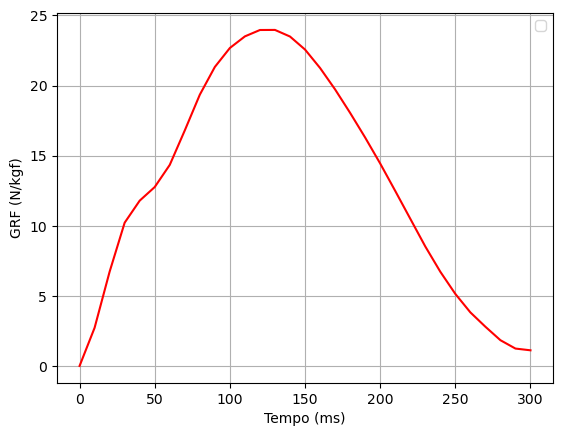

In [158]:
plt.plot(time, grf, color='r')
plt.xlabel('Tempo (ms)')
plt.ylabel('GRF (N/kgf)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


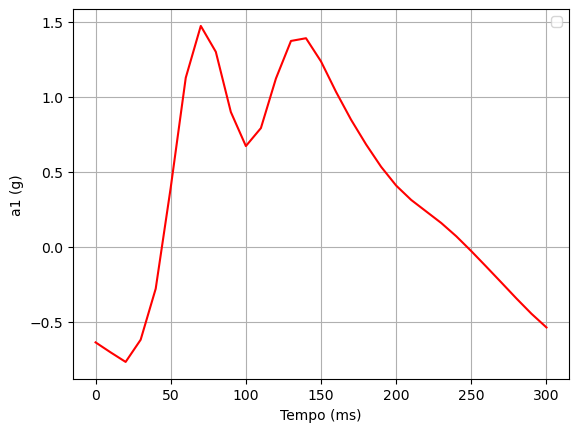

In [159]:
plt.plot(time, a1_s, color='r')
plt.xlabel('Tempo (ms)')
plt.ylabel('a1 (g)')
plt.legend()
plt.grid(True)

In [160]:
v1 = cumulative_trapezoid(a1, dx=0.1, initial=0)
p1 = cumulative_trapezoid(v1, dx=0.1, initial=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


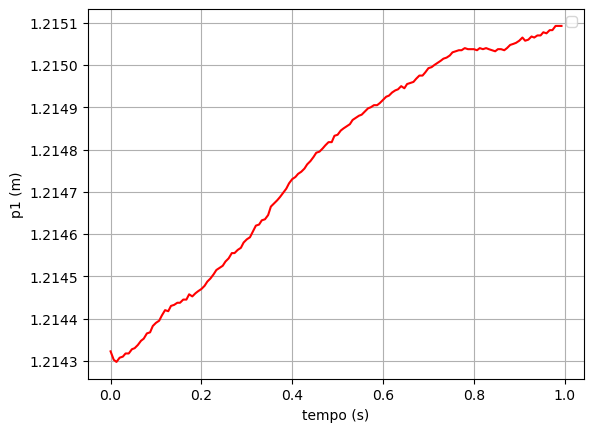

In [161]:
data_static = pd.read_csv('RBDS002static.txt', sep='\t')
dt = data_static['Time'].values[1]
trunk_mm = (data_static[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_static[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + 
            data_static[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_static[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time = data_static['Time'].values
plt.plot(data_static['Time'], trunk_mm[:,2]/1000,color="r")
plt.xlabel('tempo (s)')
plt.ylabel('p1 (m)')
plt.legend()
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


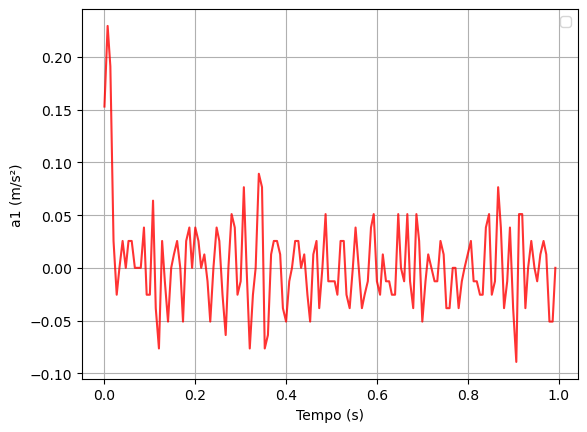

In [162]:
p1 = trunk_mm[:,2]/1000
v1 = np.gradient(p1, dt)
a1 = np.gradient(v1, dt)

plt.plot(time, a1,color="r",alpha=0.8)
plt.xlabel('Tempo (s)')
plt.ylabel('a1 (m/s²)')
plt.legend()
plt.grid(True)

In [163]:
pd.set_option('display.max_columns', None)
data_static

,Time,R.ASISX,R.ASISY,R.ASISZ,L.ASISX,L.ASISY,L.ASISZ,R.PSISX,R.PSISY,R.PSISZ,L.PSISX,L.PSISY,L.PSISZ,R.Iliac.CrestX,R.Iliac.CrestY,R.Iliac.CrestZ,L.Iliac.CrestX,L.Iliac.CrestY,L.Iliac.CrestZ,R.Thigh.Top.LateralX,R.Thigh.Top.LateralY,R.Thigh.Top.LateralZ,R.Thigh.Bottom.LateralX,R.Thigh.Bottom.LateralY,R.Thigh.Bottom.LateralZ,R.Thigh.Top.MedialX,R.Thigh.Top.MedialY,R.Thigh.Top.MedialZ,R.Thigh.Bottom.MedialX,R.Thigh.Bottom.MedialY,R.Thigh.Bottom.MedialZ,R.Shank.Top.LateralX,R.Shank.Top.LateralY,R.Shank.Top.LateralZ,R.Shank.Bottom.LateralX,R.Shank.Bottom.LateralY,R.Shank.Bottom.LateralZ,R.Shank.Top.MedialX,R.Shank.Top.MedialY,R.Shank.Top.MedialZ,R.Shank.Bottom.MedialX,R.Shank.Bottom.MedialY,R.Shank.Bottom.MedialZ,R.Heel.TopX,R.Heel.TopY,R.Heel.TopZ,R.Heel.BottomX,R.Heel.BottomY,R.Heel.BottomZ,R.Heel.LateralX,R.Heel.LateralY,R.Heel.LateralZ,L.Thigh.Top.LateralX,L.Thigh.Top.LateralY,L.Thigh.Top.LateralZ,L.Thigh.Bottom.LateralX,L.Thigh.Bottom.LateralY,L.Thigh.Bottom.LateralZ,L.Thigh.Top.MedialX,L.Thigh.Top.MedialY,L.Thigh.Top.MedialZ,L.Thigh.Bottom.MedialX,L.Thigh.Bottom.MedialY,L.Thigh.Bottom.MedialZ,L.Shank.Top.LateralX,L.Shank.Top.LateralY,L.Shank.Top.LateralZ,L.Shank.Bottom.LateralX,L.Shank.Bottom.LateralY,L.Shank.Bottom.LateralZ,L.Shank.Top.MedialX,L.Shank.Top.MedialY,L.Shank.Top.MedialZ,L.Shank.Bottom.MedialX,L.Shank.Bottom.MedialY,L.Shank.Bottom.MedialZ,L.Heel.TopX,L.Heel.TopY,L.Heel.TopZ,L.Heel.BottomX,L.Heel.BottomY,L.Heel.BottomZ,L.Heel.LateralX,L.Heel.LateralY,L.Heel.LateralZ,R.GTRX,R.GTRY,R.GTRZ,R.KneeX,R.KneeY,R.KneeZ,R.Knee.MedialX,R.Knee.MedialY,R.Knee.MedialZ,R.HFX,R.HFY,R.HFZ,R.TTX,R.TTY,R.TTZ,R.AnkleX,R.AnkleY,R.AnkleZ,R.Ankle.MedialX,R.Ankle.MedialY,R.Ankle.MedialZ,R.MT1X,R.MT1Y,R.MT1Z,R.MT5X,R.MT5Y,R.MT5Z,R.MT2X,R.MT2Y,R.MT2Z,L.GTRX,L.GTRY,L.GTRZ,L.KneeX,L.KneeY,L.KneeZ,L.Knee.MedialX,L.Knee.MedialY,L.Knee.MedialZ,L.HFX,L.HFY,L.HFZ,L.TTX,L.TTY,L.TTZ,L.AnkleX,L.AnkleY,L.AnkleZ,L.Ankle.MedialX,L.Ankle.MedialY,L.Ankle.MedialZ,L.MT1X,L.MT1Y,L.MT1Z,L.MT5X,L.MT5Y,L.MT5Z,L.MT2X,L.MT2Y,L.MT2Z
0,0.000,850.462,1049.92,1326.65,854.708,1050.52,1108.16,665.586,1098.09,1255.80,667.039,1096.40,1166.68,765.277,1132.76,1373.98,768.382,1129.46,1051.27,710.969,770.785,1416.98,719.081,660.200,1417.64,661.792,768.020,1366.74,666.191,657.853,1365.51,688.784,269.029,1435.58,697.465,189.239,1423.52,651.324,270.532,1396.15,657.608,191.380,1386.31,644.765,94.4801,1373.21,632.569,44.0961,1374.58,658.074,59.2421,1412.33,715.625,758.830,1019.45,726.577,648.996,1010.44,669.067,752.239,1069.76,674.084,641.945,1061.28,691.642,255.242,1004.45,701.873,176.429,1020.24,653.188,259.326,1041.07,663.153,175.674,1054.16,648.863,94.1880,1071.40,637.380,44.1701,1072.24,670.469,55.1819,1027.26,768.292,964.647,1398.60,734.814,558.901,1415.42,722.512,535.878,1284.64,734.213,486.711,1422.59,789.427,475.664,1367.33,709.963,105.004,1411.21,733.086,121.280,1327.27,862.516,66.2574,1323.61,838.394,56.9890,1435.80,865.889,74.7373,1366.89,776.458,953.789,1031.52,736.729,551.952,1011.66,715.439,530.049,1140.31,723.842,483.997,1007.80,780.972,459.959,1062.82,713.202,106.324,1030.54,735.404,119.141,1112.06,864.988,63.6588,1121.75,838.746,47.4824,1005.18,871.546,71.2505,1073.83
1,0.007,850.329,1049.92,1326.55,854.691,1050.53,1108.17,665.572,1098.09,1255.80,667.012,1096.40,1166.69,765.266,1132.77,1373.98,768.359,1129.46,1051.27,710.953,770.796,1416.99,719.071,660.194,1417.65,661.777,768.023,1366.74,666.176,657.853,1365.53,688.787,269.028,1435.58,697.468,189.238,1423.51,651.313,270.531,1396.15,657.607,191.383,1386.30,644.764,94.4725,1373.22,632.565,44.0884,1374.58,658.065,59.2395,1412.33,715.611,758.839,1019.46,726.555,649.003,1010.45,669.050,752.239,1069.76,674.063,641.943,1061.28,691.634,255.240,1004.45,701.885,176.425,1020.24,653.170,259.341,1041.08,663.145,175.673,1054.17,648.868,94.1831,1071.40,637.380,44.1718,1072.24,670.468,55.1845,1027.26,768.266,964.647,1398.60,734.800,558.890,1415.42,722.541,535.894,1284.66,734.208,486.714,1422.58,789.421,475.666,1367.34,709.98

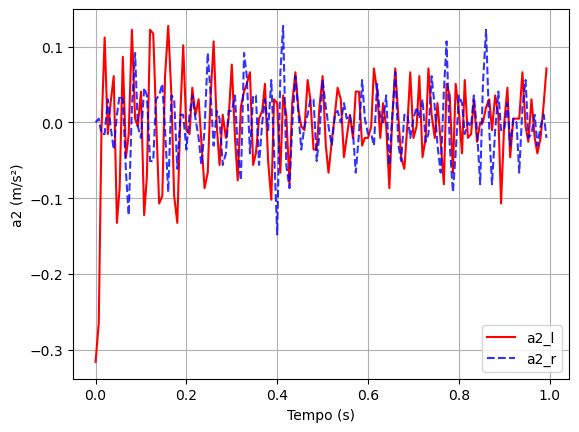

In [164]:
#Avaliação individual de cada joelho:

knee_l =data_static[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values     #joelho direito 
knee_r =data_static[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values     #joelho esquerdo

p2_l = knee_l[:,1]/1000               #m
v2_l = np.gradient(p2_l, dt)          #m/s
a2_l = np.gradient(v2_l, dt)          #m/s²

p2_r = knee_r[:,1]/1000               #m
v2_r = np.gradient(p2_r, dt)          #m/s
a2_r = np.gradient(v2_r, dt)          #m/s²

# plt.plot(time, p2_l,label="a2_l", color="r")
# plt.plot(time, p2_r,label="a2_r", color="b", linestyle='--',alpha=0.8)

plt.plot(time, a2_l,label="a2_l", color="r")
plt.plot(time, a2_r,label="a2_r", color="b", linestyle='--',alpha=0.8)

plt.xlabel('Tempo (s)')
plt.ylabel('a2 (m/s²)')
plt.legend()
plt.grid(True)

In [165]:
#theta[0] = omega1² [rad/s²]
#theta[1] = p2 [m]

def erro(theta, a1, p1): #theta são as váriaveis e a1 e p1 eu já conheço
    g = -9.81            #Valor em m/s².
    return np.sum((a1 - (theta[0]**2*(p1 - theta[1]) + g))**2)     
theta = minimize(erro, [1, 0.01], (a1, p1), method='TNC', bounds=((0,10),(-1, 1))).x     #incluído method e bounds, ajustar
theta

array([ 2.80069546, -0.03629629])

In [ ]:
#Parâmetros da amostra RBDS002static

M = 80              # kgf
h = 1.830           # m
# m1 = M*0.4970     # modelo de Dempster, utilizado trunk 
# m2 = M*0.1610     # modelo de Dempster, utilizado total leg 
g = -9.81           # Valor em m/s².
c = 0.35            # Derrick, cita intervalo de 0,15 a 0,55 foi sugerido 0,35 e Berme cita 0,20 a 0,67
omega_1 = theta[0]  # rad/s²
p1 = theta[1]       # m
g = -9.81           # m/s²

In [180]:
# Otimização de lambda

#delta[0] = lambda_m
#delta[1] = k1


def erro(delta, omega_1, M): 
    return np.sum((omega_1 - (1 + delta[0])*delta[1]/delta[0]*M)**2)     
delta = minimize(erro, [1, 50], (omega_1, M), method='TNC', bounds=((0,30),(0,100))).x  
delta

array([5.28992595, 0.02944286])

In [181]:
#Otimização para joelho esquerdo:

#omega_2² = alpha 0         rad/s²
#ksi = alpha 1      

lambda_m = delta[0]


def erro_2(alpha, a2_l, p2_l, v2_l, omega_1, lambda_m, g):      
    return np.sum (a2_l - (-alpha[0]*p2_l + omega_1*lambda_m*(p1 - p2_l) - 2*alpha[1]*alpha[0]*v2_l + g)**2)     
alpha = minimize(erro, [0.1,0.1], (a2_l, p2_l), method='TNC', bounds=((0.1,10),(-1, 0.5))).x     
alpha

array([ 0.97419063, -0.00440524])

In [ ]:
#Otimização para joelho direito:

#omega_2² = beta 0         rad/s²
#ksi = beta 1              -

def erro_2(beta, a2_r, p2_r, v2_r, omega_1, lambda_m, g): 
    return np.sum (a2_r - (-beta[0]*p2_r + omega_1*lambda_m*(p1 - p2_r) - 2*beta[1]*beta[0]*v2_r + g)**2)     
beta = minimize(erro, [0.1,0.1], (a2_r, p2_r), method='TNC', bounds=((0.1,10),(-1, 0.5))).x     
beta

array([9.54168386e-01, 1.21500301e-04])

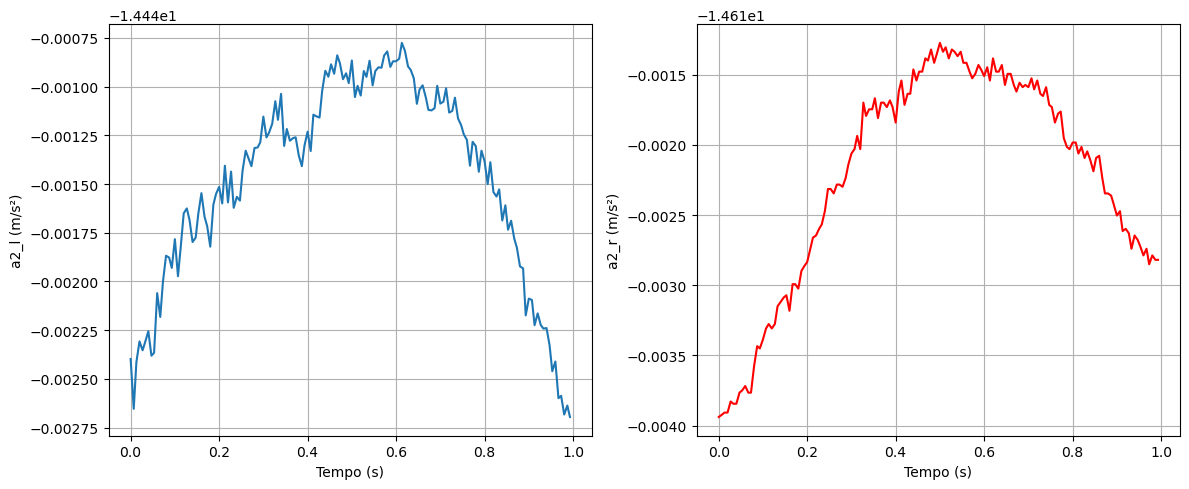

In [183]:
#Calculo atualizado de a2 com os dados obtidos da otimização:

omega_2_l = alpha [0]       # rad/s²
ksi_l = alpha [1]           # -


omega_2_r = beta [0]        # rad/s²
ksi_r = beta [1]            # -

a2_calc_l = -omega_2_l*p2_l + omega_1*lambda_m*(p1 - p2_l) - 2*ksi_l*omega_2_l*v2_l + g    # m/s²
a2_calc_r = -omega_2_r*p2_r + omega_1*lambda_m*(p1 - p2_r) - 2*ksi_r*omega_2_r*v2_r + g    # m/s²


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(time, a2_calc_l)
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('a2_l (m/s²)')
axs[0].grid(True)

axs[1].plot(time, a2_calc_r, color='red')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('a2_r (m/s²)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


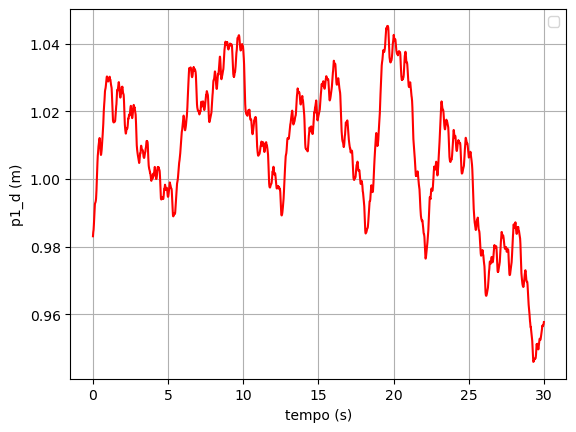

In [ ]:
#Importação dos dados dinâmicos:

data_dynamic = pd.read_csv('RBDS002runT25markers.txt', sep='\t')
t = data_dynamic['Time'].values[1]
trunk_d = (data_dynamic[['R.ASISX', 'R.ASISY', 'R.ASISZ']].values + data_dynamic[['L.ASISX', 'L.ASISY', 'L.ASISZ']].values + 
            data_dynamic[['R.PSISX', 'R.PSISY', 'R.PSISZ']].values + data_dynamic[['L.PSISX', 'L.PSISY', 'L.PSISZ']].values)/4
time_d = data_dynamic['Time'].values
plt.plot(data_dynamic['Time'], trunk_d[:,2]/1000,color="r")
plt.xlabel('tempo (s)')
plt.ylabel('p1_d (m)')
plt.legend()
plt.grid(True)


In [185]:
pd.set_option('display.max_columns', None)
data_dynamic

,Time,R.ASISX,R.ASISY,R.ASISZ,L.ASISX,L.ASISY,L.ASISZ,R.PSISX,R.PSISY,R.PSISZ,L.PSISX,L.PSISY,L.PSISZ,R.Iliac.CrestX,R.Iliac.CrestY,R.Iliac.CrestZ,L.Iliac.CrestX,L.Iliac.CrestY,L.Iliac.CrestZ,R.Thigh.Top.LateralX,R.Thigh.Top.LateralY,R.Thigh.Top.LateralZ,R.Thigh.Bottom.LateralX,R.Thigh.Bottom.LateralY,R.Thigh.Bottom.LateralZ,R.Thigh.Top.MedialX,R.Thigh.Top.MedialY,R.Thigh.Top.MedialZ,R.Thigh.Bottom.MedialX,R.Thigh.Bottom.MedialY,R.Thigh.Bottom.MedialZ,R.Shank.Top.LateralX,R.Shank.Top.LateralY,R.Shank.Top.LateralZ,R.Shank.Bottom.LateralX,R.Shank.Bottom.LateralY,R.Shank.Bottom.LateralZ,R.Shank.Top.MedialX,R.Shank.Top.MedialY,R.Shank.Top.MedialZ,R.Shank.Bottom.MedialX,R.Shank.Bottom.MedialY,R.Shank.Bottom.MedialZ,R.Heel.TopX,R.Heel.TopY,R.Heel.TopZ,R.Heel.BottomX,R.Heel.BottomY,R.Heel.BottomZ,R.Heel.LateralX,R.Heel.LateralY,R.Heel.LateralZ,L.Thigh.Top.LateralX,L.Thigh.Top.LateralY,L.Thigh.Top.LateralZ,L.Thigh.Bottom.LateralX,L.Thigh.Bottom.LateralY,L.Thigh.Bottom.LateralZ,L.Thigh.Top.MedialX,L.Thigh.Top.MedialY,L.Thigh.Top.MedialZ,L.Thigh.Bottom.MedialX,L.Thigh.Bottom.MedialY,L.Thigh.Bottom.MedialZ,L.Shank.Top.LateralX,L.Shank.Top.LateralY,L.Shank.Top.LateralZ,L.Shank.Bottom.LateralX,L.Shank.Bottom.LateralY,L.Shank.Bottom.LateralZ,L.Shank.Top.MedialX,L.Shank.Top.MedialY,L.Shank.Top.MedialZ,L.Shank.Bottom.MedialX,L.Shank.Bottom.MedialY,L.Shank.Bottom.MedialZ,L.Heel.TopX,L.Heel.TopY,L.Heel.TopZ,L.Heel.BottomX,L.Heel.BottomY,L.Heel.BottomZ,L.Heel.LateralX,L.Heel.LateralY,L.Heel.LateralZ,R.MT1X,R.MT1Y,R.MT1Z,R.MT5X,R.MT5Y,R.MT5Z,L.MT1X,L.MT1Y,L.MT1Z,L.MT5X,L.MT5Y,L.MT5Z
0,0.000,2235.64,964.243,1089.93,2236.80,987.720,873.038,2050.42,992.560,1026.350,2048.36,1002.380,942.888,2151.12,1038.37,1137.90,2131.38,1045.95,815.738,2201.71,641.019,1154.80,2250.65,542.187,1140.72,2156.60,626.479,1103.26,2204.74,529.134,1084.47,2045.47,350.011,1115.68,1987.54,294.103,1102.34,2033.86,373.539,1068.68,1974.71,320.818,1056.560,1881.51,257.0950,1024.960,1839.06,228.0600,1026.030,1857.40,235.1920,1069.580,2176.74,650.445,815.531,2218.75,548.693,829.800,2131.40,640.581,866.468,2167.57,536.918,881.118,2095.83,227.411,862.215,2063.16,157.753,887.768,2059.42,255.804,889.576,2024.54,182.616,911.711,1955.27,93.6078,944.381,1939.69,44.6662,943.555,1973.14,55.6212,898.358,2022.38,82.5375,1068.260,1970.95,129.6010,1158.62,2168.06,51.8135,988.599,2138.44,40.9174,874.217
1,0.007,2234.08,966.149,1090.67,2235.23,988.298,873.513,2048.97,994.424,1026.770,2047.07,1003.890,943.588,2147.85,1039.38,1138.34,2130.19,1046.17,816.906,2206.51,643.712,1155.54,2257.43,546.006,1141.34,2161.10,628.038,1104.73,2211.05,531.572,1085.84,2057.19,346.756,1117.21,2000.88,288.954,1104.18,2044.37,370.136,1070.45,1987.09,315.017,1058.960,1895.64,248.1300,1028.420,1853.84,217.6900,1029.200,1872.64,225.2130,1072.750,2169.23,651.059,815.960,2209.04,548.504,830.227,2122.97,642.120,866.296,2156.83,537.663,880.614,2080.49,228.028,862.808,2047.35,158.764,888.344,2044.00,256.936,890.055,2009.04,183.646,912.456,1938.80,94.3655,944.606,1922.91,45.4197,943.739,1956.33,56.3876,898.683,2043.59,80.9197,1069.210,1991.18,124.4420,1159.85,2150.99,51.6619,988.729,2121.47,41.0073,874.547
2,0.013,2232.81,968.698,1091.12,2233.86,989.094,873.665,2047.64,996.770,1027.120,2045.96,1005.510,944.158,2145.61,1041.64,1138.61,2129.59,1047.49,818.785,2210.94,646.977,1156.19,2263.81,550.273,1141.85,2165.38,630.230,1105.71,2217.11,534.750,1086.94,2069.02,343.433,1118.52,2014.52,283.933,1105.77,2054.81,366.705,1072.16,1998.81,309.503,1061.100,1909.80,238.9930,1031.230,1869.32,206.7880,1032.320,1888.15,215.2650,1075.680,2161.67,652.119,816.432,2199.10,548.791,830.784,2114.67,643.934,866.073,2145.89,539.000,880.522,2065.19,229.004,863.615,2031.34,159.957,888.847,2029.34,258.065,890.913,1993.32,185.098,913.164,1922.24,95.3874,944.869,1906.19,46.5644,943.844,1939.70,57.5059,898.831,2065.25,78.1524,1069.470,2012.17,119.1700,1160.96,2134.23,51.5979,988.890,2104.52,41.0194,874.914
3,0.020,2231.91,971.861,1091.30,2232.69,990.333,8

In [186]:
p1_d = trunk_d[:,2]/1000
v1_d = np.gradient(p1_d, t)
a1_d = np.gradient(v1_d, t)

In [187]:
#Avaliação individual de cada joelho durante a corrida:

knee_l_d =data_dynamic[['L.Shank.Top.MedialX','L.Shank.Top.MedialY','L.Shank.Top.MedialZ']].values     #joelho direito 
knee_r_d =data_dynamic[['R.Shank.Top.MedialX','R.Shank.Top.MedialY','R.Shank.Top.MedialZ']].values     #joelho esquerdo

p2_l_d = knee_l_d[:,1]/1000                                      #m
v2_l_d = np.gradient(p2_l_d, t)                                  #m/s

p2_r_d = knee_r_d[:,1]/1000                                      #m
v2_r_d = np.gradient(p2_r_d, t)                                  #m/s

In [ ]:
# Calculo de a2 da corrida

a2_calc_l_d = -omega_2_l*p2_l_d + omega_1*lambda_m*(p1_d - p2_l_d)-2*ksi_l*omega_2_l*v2_l_d + g     #m/s²
a2_calc_r_d = -omega_2_r*p2_r_d + omega_1*lambda_m*(p1_d - p2_r_d)-2*ksi_r*omega_2_r*v2_r_d + g     #m/s²

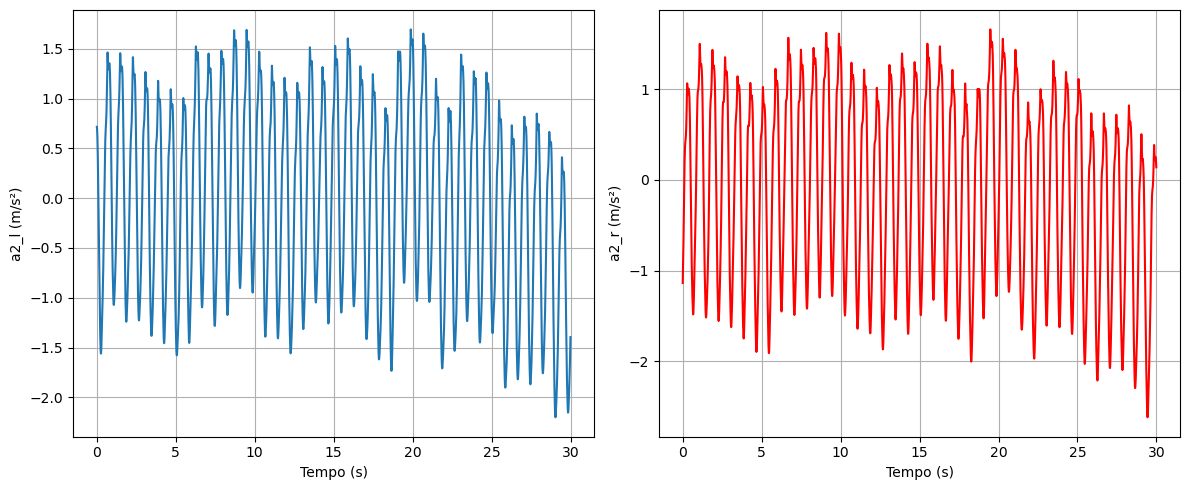

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(time_d, a2_calc_l_d)
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('a2_l (m/s²)')
axs[0].grid(True)

axs[1].plot(time_d, a2_calc_r_d, color='red')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('a2_r (m/s²)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

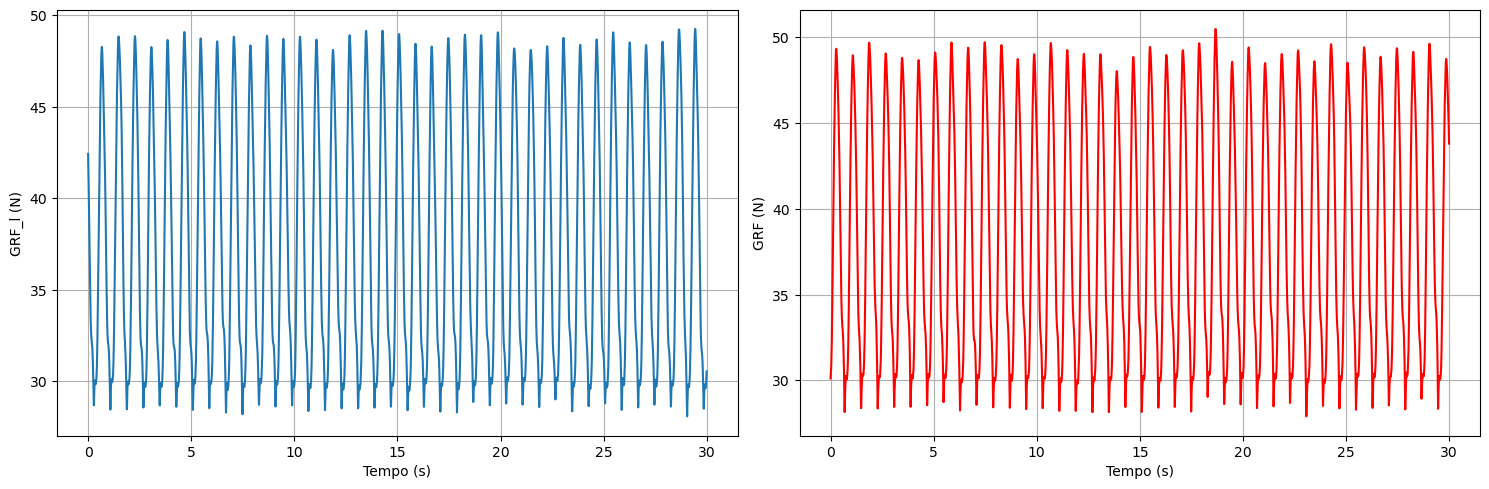

In [197]:
GRF_l = (M*9.81*omega_2_l)/(1+lambda_m)*(omega_2_l*p2_l_d + 2*ksi_l*v2_l_d)       #N
GRF_r = (M*9.81*omega_2_r)/(1+lambda_m)*(omega_2_r*p2_r_d + 2*ksi_r*v2_r_d)       #N

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(time_d, GRF_r)
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('GRF_l (N)')
axs[0].grid(True)

axs[1].plot(time_d, GRF_l, color='red')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('GRF (N)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


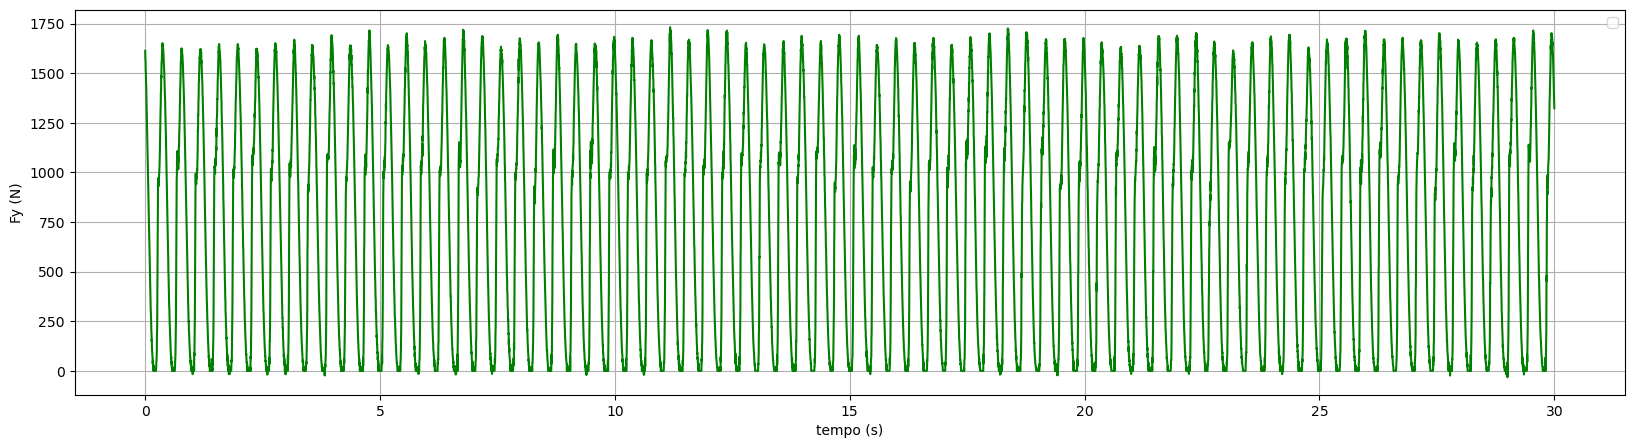

In [178]:
Forces = pd.read_csv('RBDS002runT25forces.txt', sep='\t')
sample = Forces['Time'].values
Fy_measuared = Forces[['Fy']].values

time_Fy = sample/300

fig, axs = plt.subplots(figsize=(20, 5))
plt.plot(time_Fy, Fy_measuared, color='green')
plt.xlabel('tempo (s)')
plt.ylabel('Fy (N)')
plt.legend()
plt.grid(True)

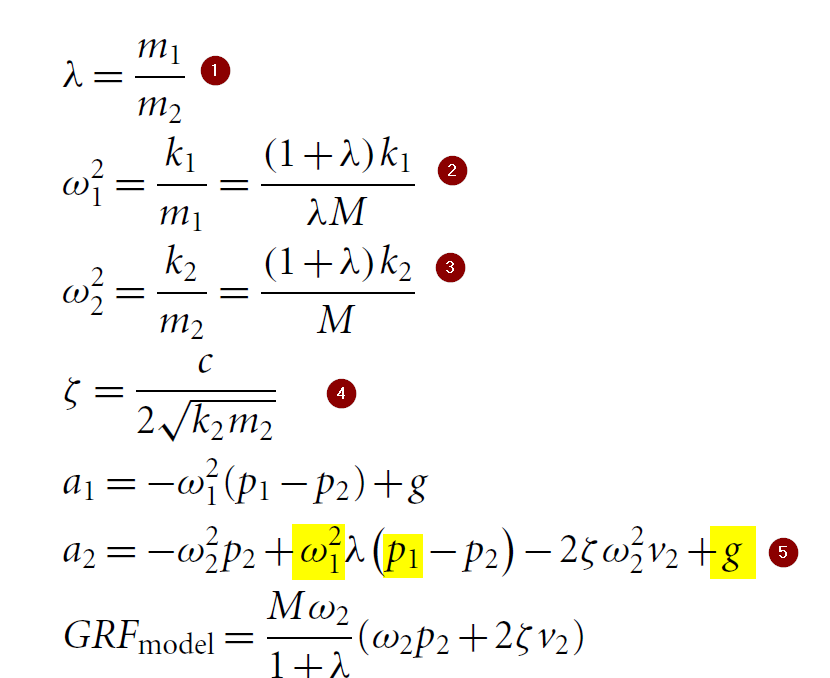



